In [1]:
from matplotlib import rc
from lmfit import Model
rc('text', usetex=False)
rc("font", family="serif")
import numpy as np #notwendige Pakete laden
import matplotlib.pyplot as plt
import matplotlib
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator, FixedFormatter, LogLocator, IndexLocator, FixedLocator, NullFormatter)
import pandas as pd
from PIL import Image


In [2]:
matplotlib.use("pgf")
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
    "figure.figsize": (6.48, 2.75),
    "pgf.texsystem": "pdflatex",
    "font.size": 13,
    "text.latex.preamble" :  r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage[output-decimal-marker={,},print-unity-mantissa=false]{siunitx} \sisetup{separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra} \DeclareSIUnit\adu{\text{ADU}} \DeclareSIUnit\px{\text{px}} \DeclareSIUnit\photons{\text{Pho\-to\-nen}} \DeclareSIUnit\photon{\text{Pho\-ton}}",
    "pgf.preamble": r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage[output-decimal-marker={,},print-unity-mantissa=false]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra} \DeclareSIUnit\adu{\text{ADU}} \DeclareSIUnit\px{\text{px}} \DeclareSIUnit\photons{\text{Pho\-to\-nen}} \DeclareSIUnit\photon{\text{Pho\-ton}}",
    #r"\usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}"])
})

In [3]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self):
        self.format = self.fformat
        if self._useMathText:
            self.format = ('\\num{%s}' % self.format)
    

In [4]:
import os
from matplotlib.patches import Ellipse
import skimage.transform
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import ImageGrid

In [5]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator, LogLocator,FormatStrFormatter, FuncFormatter)

In [6]:
from skimage.io import imread

In [7]:
import lmfit
from lmfit.models import GaussianModel, LinearModel

In [8]:
data_path = '220501_pictures/scattering/'
plots_output_path = 'plots_output/'

In [9]:
lognorm = matplotlib.colors.LogNorm(1,1000)

In [10]:
cmap = matplotlib.cm.get_cmap('plasma').copy()


In [11]:
prop = dict(arrowstyle="-|>,head_width=0.2,head_length=0.8",
            shrinkA=0,shrinkB=0, fc='green', ec='green', color='green')

# Resonance

## Show pedestals and raw pictures

Axes(0.125,0.125;0.775x0.755)


C:\Users\lunin\AppData\Local\Temp/ipykernel_4344/2672953945.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=2.3)


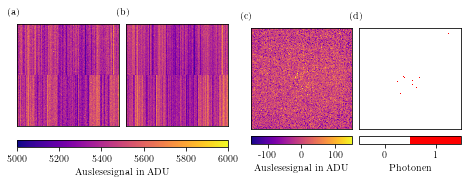

In [169]:
%matplotlib inline
#grob
fig = plt.figure(figsize=(6.48,5.5))
(subfig_l, subfig_r) = fig.subfigures(nrows=1, ncols=2, width_ratios=(1,1), wspace=0, hspace=0.0)
grid = ImageGrid(subfig_l, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="single",
                 cbar_size=0.1,
                 #cbar_pad=0.15,
                 )
grid2 = ImageGrid(subfig_r, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="each",
                 cbar_size=0.1,
                 #cbar_pad=0.15,
                 )
print(grid[0])
imgs = []
lognorm_raw = matplotlib.colors.SymLogNorm(vmin=-250,vmax=250, linthresh=1.)
#lognorm_raw =  matplotlib.colors.Normalize(vmin=5e3,vmax=6e5)
norm = matplotlib.colors.Normalize(5e3, 6e3)
image = imread(data_path + 'capture_without_pedestal_substraction/image_sum_1.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'peds/ped_0.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'no_filter_resonance/070322_no_filter_sum_1.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)']
ims = []
c = 0 
for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=norm,rasterized=True)
    #fig.colorbar(ims[c], orientation='horizontal', ax=axis, fraction=0.043, pad=0.04,)
    t = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label = 'Auslesesignal in ADU')
scnd_norm = matplotlib.colors.Normalize(-150, 150)

    
axis = grid2[0]
axis.set_xticks([]) 
axis.set_yticks([])
axis.text(-0.1, 1.1, letters[2], transform=axis.transAxes,)
im = axis.pcolormesh(imgs[2], cmap=cmap, norm=scnd_norm,rasterized=True)
axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Auslesesignal in ADU')

axis = grid2[1]
sm_lg_norm = matplotlib.colors.Normalize(0,2)
th_img = (imgs[2] > 100)
im1 = axis.pcolormesh(th_img, cmap=matplotlib.colors.ListedColormap(['#FFFFFF00', 'red']), norm=sm_lg_norm,rasterized=True)
#fig.colorbar(ims[c], orientation='horizontal', ax=axis, fraction=0.043, pad=0.04,)
axis.cax.colorbar(im1, format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Photonen', ticks=[0.5,1.5])
axis.text(-0.1, 1.1, letters[3], transform=axis.transAxes,)

fig.tight_layout(pad=2.3)


In [170]:
fig.savefig(plots_output_path + 'capture_ped_diff.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

In [ ]:
print(1 + np.nan)

## Thresholding

C:\Users\lunin\AppData\Local\Temp/ipykernel_24040/3596588422.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


[1284646917.0, 3168569.0, 1476815.0, 543377.0, 225186.0, 148889.0]


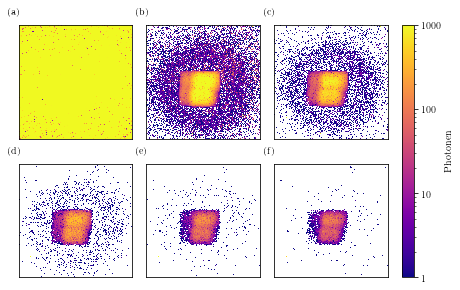

In [173]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_0_resonance/single_count_mask_only_th_0_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_100_resonance/single_count_mask_only_th_100_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_125_resonance/single_count_mask_only_th_125_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Photonen')
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()
print(list(map(lambda x: x.sum(axis=(0,1)), imgs)))

In [ ]:
fig.savefig(plots_output_path + 'th_0_100_125_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_24040/1584455105.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


[48858994.0, 3168569.0, 1476815.0, 543377.0, 225186.0, 148889.0, 76076.0, 41736.0, 10716.0]
(240, 240)


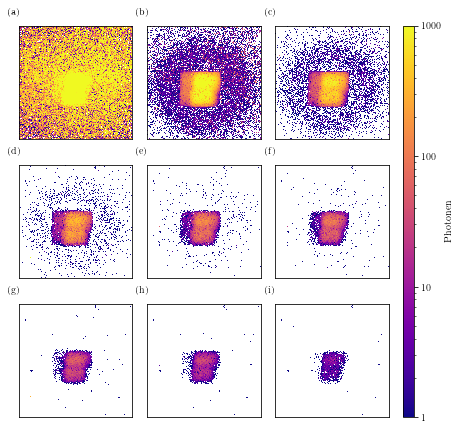

In [174]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(3,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="3%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_50_resonance/single_count_mask_only_th_50_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_100_resonance/single_count_mask_only_th_100_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_125_resonance/single_count_mask_only_th_125_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_200_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_220_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_260_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)





letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Photonen')
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()
print(list(map(lambda x: x.sum(axis=(0,1)), imgs)))
print(imgs[0].shape)

In [ ]:
fig.savefig(plots_output_path + 'th_50_100_125_150_170_180_200_220_260.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

### SNR

In [63]:
rr, cc = skimage.draw.ellipse(106,115, 100, 110)
ellipse_mask = np.zeros([240,240], dtype=np.uint8)
ellipse_mask[rr, cc] = 1

direct_mask = np.ones([240,240], dtype=np.uint8)
direct_mask[68:148,68:152] = 0
direct_mask[91:152,150:156] = 0

mask_signal = ellipse_mask*direct_mask
mask_noise = np.logical_not(ellipse_mask)*direct_mask



def avg_signal(img):
    signal_only = img*mask_signal
    nonzero_px = np.count_nonzero(signal_only)
    avg_signal_value = signal_only.sum(axis=(0,1))/mask_signal.sum(axis=(0,1))
    return avg_signal_value

def avg_noise(img):
    noise_only = img*mask_noise
    nonzero_px = np.count_nonzero(noise_only)
    avg_noise_value = noise_only.sum(axis=(0,1))/mask_noise.sum(axis=(0,1))
    return avg_noise_value

In [176]:
ths = [50, 100, 125, 150, 170, 180, 200, 220, 260]

imgs = []
image = imread(data_path + 'th_50_resonance/single_count_mask_only_th_50_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_100_resonance/single_count_mask_only_th_100_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_125_resonance/single_count_mask_only_th_125_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_200_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_220_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_260_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

imgs_snr = []
for img in imgs:
    snr = avg_signal(img)/avg_noise(img)
    imgs_snr.append(10*np.log(snr))

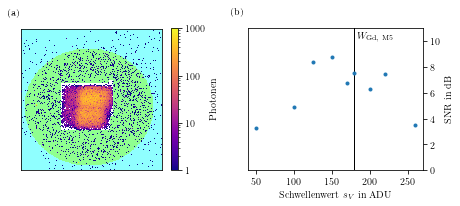

In [128]:
%matplotlib inline
#grob

# fig.suptitle('Gd M5 scattering, no filter')
fi, axes =  plt.subplots(1,2,figsize=(6.48, 3.0))

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
stray = image.astype(np.float64)
#graph[image == 0] = np.nan

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, letter in zip(axes, letters):
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
axis = axes[0]
im = axis.pcolormesh(stray, cmap=cmap, norm=lognorm,rasterized=True, zorder=99)
axis.pcolormesh(mask_noise, rasterized=True, cmap = matplotlib.colors.ListedColormap(['#FFFFFF00', '#00FFFF70']), zorder=-99)
axis.pcolormesh(mask_signal, rasterized=True, cmap = matplotlib.colors.ListedColormap(['#FFFFFF00', '#00FF0070']), zorder=-99)
axis.set_xticks([]) 
axis.set_yticks([])
axis.set_aspect(1.)
fi.colorbar(im, ax=axis, format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Photonen' )
    
axis = axes[1]
axis.yaxis.tick_right()
axis.set_ylim(0,11)
axis.yaxis.set_label_position("right")
axis.errorbar(ths, imgs_snr, fmt='o', markersize=3,)
axis.set_xlabel('Schwellenwert $s_V$ in ADU')
axis.set_ylabel('SNR in dB')
axis.axvline(180, linestyle="-",color='black', linewidth=1, alpha=1, zorder=-10)
axis.text(180+3, 10.2, '$W_\\text{Gd, M5}$', ha='left')

fi.tight_layout()
#print(list(map(lambda x: x.sum(axis=(0,1)), imgs)))

In [129]:
fi.savefig(plots_output_path + 'th_150_mask_snr.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_24040/4186884719.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


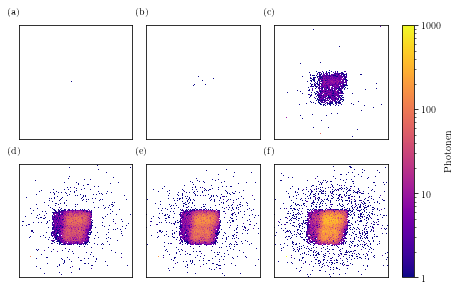

In [177]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_1.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_5.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_1000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_10000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_20000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Photonen')
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()
frames =  [1, 5, 1000, 10000, 20000, 50000]
photons = list(map(lambda x: x.sum(axis=(0,1)), imgs))

In [ ]:
fig.savefig(plots_output_path + 'th_150_sums.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_24040/469254089.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


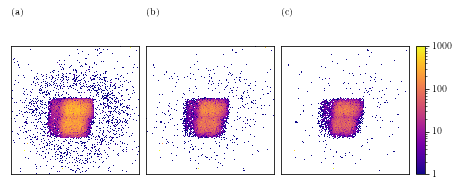

In [178]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.1, 0.25),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(0, 300, letter)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)
ticklabs = cb.ax.get_yticklabels()
for t in ticklabs:
    t.set_verticalalignment('center')

fig.tight_layout()

In [ ]:
fig.savefig(plots_output_path + 'th_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

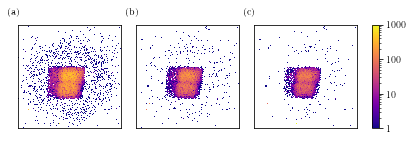

In [179]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

#fig.tight_layout()

In [ ]:
fig.savefig(plots_output_path + 'th_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_24040/4180074362.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


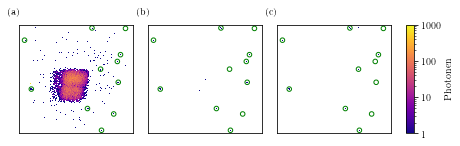

In [180]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
image1 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_450_sum_50000.tiff')
image = image[80:320, 80:320]
image2 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_600_sum_50000.tiff')
image = image[80:320, 80:320]
image2 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']
spots = [(28,98), (162,233), (218,159), (183, 7), (181,142), (220,113), (210,43), (13,206),  (152,55), (236,232), (225,174)]

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )
    for spot in spots:
        circle = matplotlib.patches.Circle(spot, radius=5, fill=False, ec='green')
        axis.add_patch(circle)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Photonen')
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()

In [ ]:
fig.savefig(plots_output_path + 'th_180_450_600.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

# SNR via quantum efficiency and noise per pixel

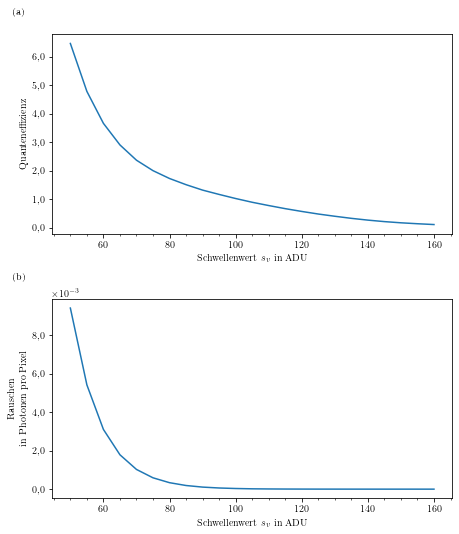

In [83]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
axes = fig.subplots(2,1)
ylabels = ['Quanteneffizienz', '\\begin{tabular}{c}Rauschen\\\\ in Photonen pro Pixel\\end{tabular}', 'SNR in \\si{\\decibel}']
y_values = [qe, wrong_detected_ph, 10*np.log10((qe - wrong_detected_ph)/wrong_detected_ph)]
c = 0
letters = ['(a)', '(b)',]
orders = [8, 9,9]
for axis, letter, ylabel, y_value in zip(axes, letters, ylabels, y_values):
    axis.set_xlabel(r'Schwellenwert $s_v$ in ADU')
    axis.plot(thresholds, y_value)
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    axis.set_ylabel(ylabel)
    axis.xaxis.set_minor_locator(MultipleLocator(5))
    c+=1
    
axes[1].yaxis.set_major_formatter(OOMFormatter(order = -3))
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.1f}" % x))

fig.tight_layout()


In [15]:
fig.savefig(plots_output_path + 'qe_pixel_noise_snr.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

## poisson noise

\noindent
old:

\begin{equation}
        S_{\text{EW}}(s_V, N_A, N_P) = N_{A}N_{P}\left[\text{PF}\cdot\text{QE}(s_V) - \text{FPDA}(s_V)\right]
        \label{eq:signal_ew}
\end{equation}
und das entsprechende Shrotrauschen 
\begin{equation}
        N_{\text{EW}}(s_V, N_A, N_P) = \sqrt{N_{A}N_{P}\left[\text{PF}\cdot\text{QE}(s_V) + \text{FPDA}(s_V)\right]}
\end{equation}

new:

\begin{equation}
    \text{RQE}(s_V) =  \frac{\text{digitale Pixelzahl}(s_V) - \text{FDPA}(s_V)\cdot 300\cdot100\cdot 100  }{\text{analoge Pixelzahl}}
\end{equation}
RQE - reduzierte Quanteneffizienz

so:

\begin{equation}
        S_{\text{EW}}(s_V, N_A, N_P) = N_{A}N_{P}\left[\text{PF}\cdot\text{RQE}(s_V) \right]
\end{equation}
und das entsprechende Shrotrauschen 
\begin{equation}
        N_{\text{EW}}(s_V, N_A, N_P) = \sqrt{N_{A}N_{P}\left[\text{PF}\cdot\text{RQE}(s_V) + \text{FPDA}(s_V)\right]}
\end{equation}



In [118]:
thresholds, signal, noise = np.loadtxt('signal_noise_per_pixel.csv', delimiter=',', unpack=True)

In [119]:
thresholds, qe, wrong_detected_ph = np.loadtxt('threshold_QE_noise_per_pixel.csv', delimiter=',', unpack=True)

In [120]:
thresholds, rqe, fdpa = np.loadtxt('threshold_reduced_QE_noise_per_pixel.csv', delimiter=',', unpack=True)

In [121]:
direct_beam_flux = 4.57e-3
ring_beam_flux = 3.88e-5

In [122]:
s_direct_beam_single_pixel = 300*1*direct_beam_flux*rqe
n_direct_beam_single_pixel = np.sqrt(300*1*(direct_beam_flux*rqe + fdpa))

s_ring_beam_single_pixel = 50000*1*ring_beam_flux*rqe
n_ring_beam_single_pixel = np.sqrt(50000*1*(ring_beam_flux*rqe + fdpa))

avg_ring_px_radius = 80
avg_ring_length_px = 2*np.pi*avg_ring_px_radius

s_ring_beam_avg_length_pixel = 50000*avg_ring_length_px*ring_beam_flux*rqe
n_ring_beam_avg_length_pixel = np.sqrt(50000*avg_ring_length_px*(ring_beam_flux*rqe + fdpa))

<IPython.core.display.Javascript object>


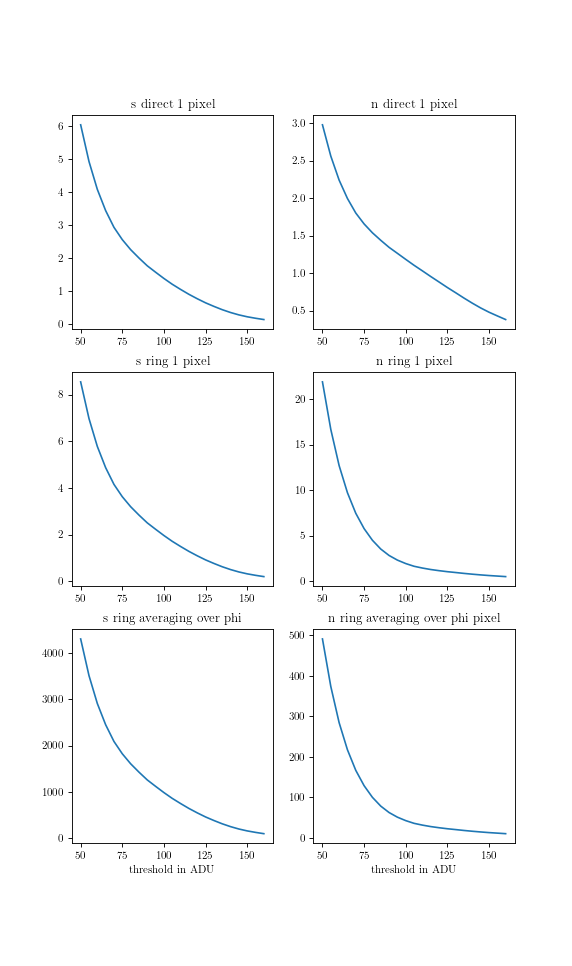

Text(0.5, 0, 'threshold in ADU')

In [69]:
%matplotlib notebook
plt.subplot(3,2,1)
plt.plot(thresholds, s_direct_beam_single_pixel)
plt.title('s direct 1 pixel')

plt.subplot(3,2,2)
plt.plot(thresholds, n_direct_beam_single_pixel)
plt.title('n direct 1 pixel')

plt.subplot(3,2,3)
plt.plot(thresholds, s_ring_beam_single_pixel)
plt.title('s ring 1 pixel')

plt.subplot(3,2,4)
plt.plot(thresholds, n_ring_beam_single_pixel)
plt.title('n ring 1 pixel')

plt.subplot(3,2,5)
plt.plot(thresholds, s_ring_beam_avg_length_pixel)
plt.title('s ring averaging over phi')
plt.xlabel('threshold in ADU')

plt.subplot(3,2,6)
plt.plot(thresholds, n_ring_beam_avg_length_pixel)
plt.title('n ring averaging over phi pixel')
plt.xlabel('threshold in ADU')

In [31]:
plt.savefig('noises_mit_rqe.png',bbox_inches='tight', pad_inches=0.1, dpi=500, facecolor='white', transparent=False)

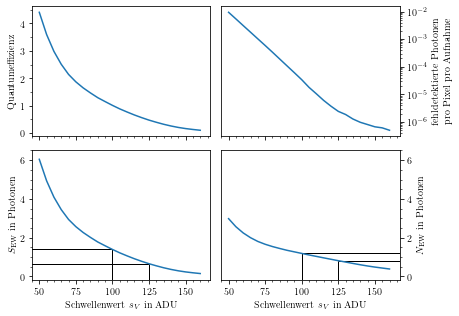

In [123]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,4.5))
axes = fig.subplots(2,2).flatten()
ylabels = ['Quantumeffizienz', r"\begin{tabular}{c}fehldetektierte Photonen\\pro Pixel pro Aufnahme\end{tabular}", r"$S_{\text{EW}}$ in Photonen", r"$N_{\text{EW}}$ in Photonen"]
# old (incorrect) values
# y_values = [qe, wrong_detected_ph, signal, noise]

# new (correct) values
y_values = [rqe, fdpa, s_direct_beam_single_pixel, n_direct_beam_single_pixel]
c = 0
letters = ['(a)', '(b)',]
orders = [8, 9,9]
for axis, ylabel, y_value in zip(axes, ylabels, y_values):
    if c % 2 == 1:
        axis.yaxis.set_label_position("right")
        axis.yaxis.tick_right()
    axis.plot(thresholds, y_value,  zorder=9999)
    axis.set_ylabel(ylabel)
    axis.set_xlim(45, 167)
    #axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    axis.xaxis.set_minor_locator(MultipleLocator(5))
    c+=1
    
#axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.1f}" % x))
#axes[1].yaxis.set_major_formatter(OOMFormatter(order=-3,fformat='%1.0f'))
axes[1].set_yscale('log')
axes[0].xaxis.set_major_formatter(NullFormatter())
axes[1].xaxis.set_major_formatter(NullFormatter())

axes[2].set_xlabel(r'Schwellenwert $s_V$ in ADU')
axes[3].set_xlabel(r'Schwellenwert $s_V$ in ADU')

axes[0].yaxis.set_minor_locator(MultipleLocator(1))

axes[2].set_ylim(-.2,6.5)
axes[3].set_ylim(-.2,6.5)

#axes[1].yaxis.set_minor_locator(MultipleLocator(1e-3))
#axes[2].yaxis.set_major_locator(MultipleLocator(1))
#axes[3].yaxis.set_major_locator(MultipleLocator(1))

axes[0].yaxis.set_minor_locator(MultipleLocator(0.5))

axes[2].yaxis.set_minor_locator(MultipleLocator(0.5))
axes[3].yaxis.set_minor_locator(MultipleLocator(0.5))

axes[2].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.f}" % x))


args = np.argwhere(np.logical_and(thresholds >= 100, thresholds<=125))
signals_slice = s_direct_beam_single_pixel[args]

y_100, y_125 = signals_slice[0], signals_slice[-1]
axes[2].hlines(y=y_100, xmin=0, xmax=100, linestyle="-",color='black', linewidth=1, alpha=1, zorder=1)
axes[2].hlines(y=y_125, xmin=0, xmax=125, linestyle="-",color='black', linewidth=1, alpha=1, zorder=1)
axes[2].vlines(x=100, ymin=-5, ymax=y_100, linestyle="-",color='black', linewidth=1, alpha=1, zorder=1)
axes[2].vlines(x=125, ymin=-5, ymax=y_125, linestyle="-",color='black', linewidth=1, alpha=1, zorder=1)

noise_slice = n_direct_beam_single_pixel[args]
y_100_noise, y_125_noise = noise_slice[0], noise_slice[-1]
axes[3].hlines(y=y_100_noise, xmin=100, xmax=170, linestyle="-",color='black', linewidth=1, alpha=1, zorder=1)
axes[3].hlines(y=y_125_noise, xmin=125, xmax=170, linestyle="-",color='black', linewidth=1, alpha=1, zorder=1)
axes[3].vlines(x=100, ymin=-5, ymax=y_100_noise, linestyle="-",color='black', linewidth=1, alpha=1, zorder=1)
axes[3].vlines(x=125, ymin=-5, ymax=y_125_noise, linestyle="-",color='black', linewidth=1, alpha=1, zorder=1)

fig.tight_layout()


In [115]:
fig.savefig(plots_output_path + 'qe_fehldetektiert_signal_noise.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

### Scatter-ring photonflux for th = 100 ADU

In [124]:
thresholds, qe, wrong_detected_ph = np.loadtxt('threshold_QE_noise_per_pixel.csv', delimiter=',', unpack=True)
thresholds, rqe, fdpa = np.loadtxt('threshold_reduced_QE_noise_per_pixel.csv', delimiter=',', unpack=True)
arg = np.argwhere(thresholds == 100)
# old formulas
# qe_100 = qe[arg][:,0][0]
# fdpa_100 = wrong_detected_ph[arg][:,0][0]

# new formulas
qe_100 = rqe[arg][:,0][0]
fdpa_100 = fdpa[arg][:,0][0]

27549
3.88e-05
single pixel 1.965178409379651 1.9144655675617805
single pixel 1.0264892942851185
average over radius 926.068508085058 41.55929059488931
average over radius 22.283068234060277


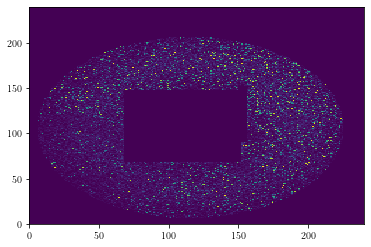

In [145]:
%matplotlib inline
image = imread('220501_pictures/scattering/th_100_200_resonance/th_100_200_resonance_50000.tiff')
image_masked = np.array(image)
image_masked = image_masked[80:320, 80:320]
image_masked[68:148,68:152] = 0
image_masked[91:152,150:156] = 0
image_masked = (image_masked < 50) * image_masked

plt.pcolormesh(image_masked*mask_signal)

n_pixel = mask_signal.sum()
print(n_pixel)
n_frames = 50000
signal = image_masked*mask_signal

photon_flux = (signal.sum() - fdpa_100*n_pixel*n_frames)/(qe_100*n_pixel*n_frames)

print(f'{photon_flux:1.2e}')
rad_int = 2*np.pi*75
ind = n_frames*1*(photon_flux * qe_100 + fdpa_100)

for n_pixel, case in zip([1, rad_int], ['single pixel', 'average over radius']):
    signal_pro_pixel = n_frames*n_pixel*photon_flux*qe_100
    noise_pro_pixel = np.sqrt(n_frames*n_pixel*(photon_flux*qe_100 + fdpa_100))
    print(case, signal_pro_pixel, noise_pro_pixel)
    print(case, signal_pro_pixel/noise_pro_pixel)


## Polar transform

In [ ]:
thresholds, qe, wrong_detected_ph = np.loadtxt('threshold_QE_noise_per_pixel.csv', delimiter=',', unpack=True)
thresholds, rqe, fdpa = np.loadtxt('threshold_reduced_QE_noise_per_pixel.csv', delimiter=',', unpack=True)
arg = np.argwhere(thresholds == 100)
# old formulas
# qe_100 = qe[arg][:,0][0]
# fdpa_100 = wrong_detected_ph[arg][:,0][0]

# new formulas
qe_100 = rqe[arg][:,0][0]
fdpa_100 = fdpa[arg][:,0][0]

#### horizontal & vertical masks

In [84]:
polygons = []
r = 200
angles = np.array([np.pi/4, 3*np.pi/4, -3/4*np.pi, -np.pi/4])
next_angles = np.roll(angles, shift=1)
xs = [[106 + r*np.cos(angle), 106 + r*np.cos(next_angle), 106] for angle, next_angle in zip(angles, next_angles)]
ys = [[115 + r*np.sin(angle), 115 + r*np.sin(next_angle), 115] for angle, next_angle in zip(angles, next_angles)]

for x, y in zip(xs,ys):
    rr, cc = skimage.draw.polygon(x,y)
    polygon = np.zeros([500,500], dtype=np.uint8)
    polygon[rr, cc] = 1
    polygons.append(polygon)

<IPython.core.display.Javascript object>


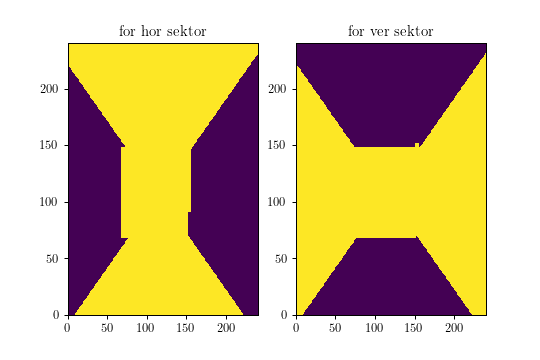

In [93]:
%matplotlib notebook


mask_for_hor_sektor = np.logical_not(polygons[0][0:240, 0:240] + polygons[2][0:240, 0:240])
direct_mask_inverted = np.logical_not(direct_mask)

mask_for_hor_sektor = mask_for_hor_sektor * direct_mask_inverted
mask_for_hor_sektor = np.logical_not(mask_for_hor_sektor)

mask_for_ver_sektor = np.logical_not(polygons[1][0:240, 0:240] + polygons[3][0:240, 0:240])
direct_mask_inverted = np.logical_not(direct_mask)

mask_for_ver_sektor = mask_for_ver_sektor * direct_mask_inverted
mask_for_ver_sektor = np.logical_not(mask_for_ver_sektor)


plt.subplot(1,2,1)
plt.pcolormesh(mask_for_hor_sektor)
plt.title('for hor sektor')
plt.subplot(1,2,2)
plt.title('for ver sektor')

plt.pcolormesh(mask_for_ver_sektor)


#### pyFAI

In [35]:
import pyFAI
pyFAI.disable_opencl=True # get rid of annoying warning ;)
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
from pyFAI.detectors import Detector
from pyFAI.calibrant import Cell, Calibrant

In [46]:
import lmfit
from lmfit.models import GaussianModel, Model
import scipy.special

In [38]:
def px_to_q_um(px):
    mm = px/400*10
    theta_half = np.arctan(mm/607.)/2. # 607 distance from sample to sensor
    lambd = 1.0465e-6 # 1.05nm -> 1.05e-6mm 1,0465
    q = 4*np.pi/lambd * np.sin(theta_half)
    return q*1e-3

def q_um_to_px(q):
    lambd = 1.0465e-6
    mm = 607.*np.tan(2*np.arcsin(q*1e3*lambd/(4*np.pi)))
    px = mm/10*400
    return px

In [36]:
image = imread('220501_pictures/scattering/th_100_200_resonance/th_100_200_resonance_50000.tiff')
image_pyfai = np.array(image)
image_pyfai = image_pyfai[80:320, 80:320]
image_pyfai = image_pyfai - 50000 * fdpa_100
image_pyfai = (image_pyfai < 50) * image_pyfai

print(image_pyfai.shape)
direct_mask = np.zeros([240, 240])
direct_mask[68:148,68:152] = 1
direct_mask[91:152,150:156] = 1

(240, 240)


In [98]:
detector = Detector(1e-2 / 400, 1e-2 / 400)  # binned!
ai = AzimuthalIntegrator(dist=0.607, #Distanz Detektor Probe
                         poni2= 115 * 1e-2 / 400, #Zentrum des Strahls, eigentlich... Aber ich habe bisher nicht herausgefunden, welche Werte da wie übertragen werden.
                         poni1= 106 * 1e-2 / 400, #Zentrum des Strahls2, einfach rumprobieren, bis dein Streuring gerade ist und dein q-raum bei 0 anfängt
                         detector=detector, #detektor, den du vorher definierst hast
                         wavelength=1.0465e-9) #Wellenlänge des Probe

In [171]:
I_t, q_t, phi_t = ai.integrate2d(image_pyfai, 300, unit='q_nm^-1', mask = direct_mask, correctSolidAngle=False)

q_360, I_360 = ai.integrate1d(image_pyfai, 100, unit='q_nm^-1', radial_range = (10.9e-3, 40e-3), mask = direct_mask, correctSolidAngle = False)
q_ver, I_ver = ai.integrate1d(image_pyfai, 50, unit='q_nm^-1', radial_range = (11e-3, 40e-3),  mask = mask_for_ver_sektor, correctSolidAngle = False)
q_hor, I_hor = ai.integrate1d(image_pyfai, 50, unit='q_nm^-1', radial_range = (11e-3, 40e-3),  mask = mask_for_hor_sektor, correctSolidAngle = False)


(170, 360)


C:\Users\lunin\AppData\Local\Temp/ipykernel_15372/2689859145.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


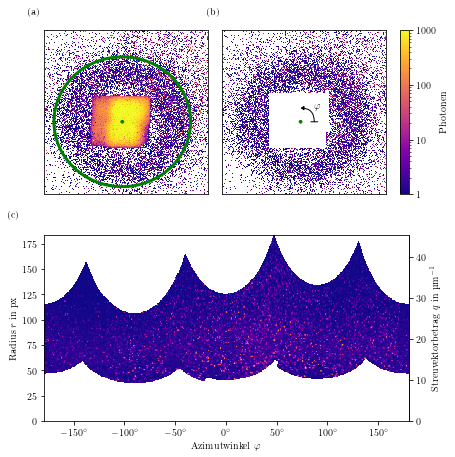

In [146]:
%matplotlib inline 
#grob
fig = plt.figure(figsize=(6.48,6.0))
(subfig_l, subfig_r) = fig.subfigures(nrows=2, ncols=1, height_ratios=(1,1), hspace=0.0)
grid = ImageGrid(subfig_l, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=(0.2, 0.0),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",)
                 #cbar_pad=0.15,
imgs = []
                 
image = imread('220501_pictures/scattering/th_100_200_resonance/th_100_200_resonance_50000.tiff')
image = image - 50000 * fdpa_100
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread('220501_pictures/scattering/th_100_200_resonance/th_100_200_resonance_50000.tiff')
image_masked = np.array(image)
image_masked = image_masked - 50000 * fdpa_100
image_masked = image_masked[80:320, 80:320]
image_masked[68:148,68:152] = 0
image_masked[91:152,150:156] = 0
image_masked = (image_masked < 50) * image_masked
imgs.append(image_masked)

letters = ['(a)', '(b)', '(c)']

axe = subfig_r.add_subplot(1,1,1)
#axe.set_title('polar')
axe.set_ylabel('Radius $r$ in px')
axe.set_xlabel('Azimutwinkel $\\varphi$')
axe.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '\\SI{%d}{\\degree}' % x))


graph = image_polar.astype(np.float64)
graph[image_polar == 0] = np.nan

polar_transformed = I_t.T
polar_transformed[polar_transformed == 0] = np.nan

im = axe.pcolormesh(phi_t, q_um_to_px(q_t*1e3), polar_transformed, cmap=cmap,rasterized=True)
print(graph.T.shape)
axe.set_aspect('1')
axe.text(-0.1, 1.1, letters[2], transform=axe.transAxes,)

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.set_xlim(0,240)
    axis.set_ylim(0,240)
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True)
    #fig.colorbar(ims[c], orientation='horizontal', ax=axis, fraction=0.043, pad=0.04,)
    axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Photonen')

a3 = patches.FancyArrowPatch((115+20, 106), (115, 106+20), arrowstyle="-|>,head_width=1.7,head_length=2.5",
                             connectionstyle="angle3,angleA=90,angleB=0", shrinkA=0,shrinkB=0,  fc='k', ec='k')
a4 = patches.FancyArrowPatch((115, 106+20), (115-20, 106), arrowstyle="-|>,head_width=1.7,head_length=2.5",
                             connectionstyle="angle3,angleA=0,angleB=90", shrinkA=0,shrinkB=0,  fc='k', ec='k')

end_line = patches.FancyArrowPatch((115+20-5, 106), (115+20+5, 106), arrowstyle="-", shrinkA=0,shrinkB=0,  fc='k', ec='k')
grid[1].add_patch(a3)
#grid[1].add_patch(a4)
grid[1].add_patch(end_line)

grid[1].text(115+25, 106+20, '$\\varphi$', ha='center')

center = matplotlib.patches.Circle((115,106), ec='green', fc='green', radius=2, zorder=99)

grid[1].add_patch(center)
ellipse1 = matplotlib.patches.Ellipse((115,106), width=2*100, height=2*95, fill=False )
#grid[1].add_patch(ellipse1)
#grid[0].add_patch(center)

#grid[1].text(115, 106-18, '$r = \\SI{0}{px}$', ha='center', zorder=99)

center_old = matplotlib.patches.Circle((115,106), ec='green', fc='green', radius=2, zorder=99)
ellipse_old = matplotlib.patches.Ellipse((115,106), width=2*100, height=2*95, ec='green',fill=False, linewidth=3, zorder=99 )

grid[0].add_patch(center_old)
grid[0].add_patch(ellipse_old)

secax = axe.secondary_yaxis('right', functions=(px_to_q_um, q_um_to_px))
secax.set_ylabel('Streuvektorbetrag $q$ in \\si{\\per\\micro\\meter}')


fig.tight_layout()

In [63]:
fig.savefig('radial_th_170.jpg', transparent=False, dpi=500, bbox_inches='tight',)

In [147]:
fig.savefig(plots_output_path + 'th_100_200_masked_radial_transform.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

In [52]:
def q_reziproker_m_to_m(q):
    # alles in meter
    lambd = 1.0465e-9
    m = 0.607*np.tan(2*np.arcsin(q*lambd/(4*np.pi)))
    return m

In [53]:
# bedingung 70px == 2pi/(5um)*70 <=> 1px = 2pi/(5um)
# so radius (35px) must corres
x = q_reziproker_m_to_m(2*np.pi / 5e-6 * 35)
print('35px would took %.2e m' % x)
px_size_m = x/35
print('so 1px would took %.2e m' % px_size_m)

35px would took 4.45e-03 m
so 1px would took 1.27e-04 m


In [54]:
mfm = np.load('/Users/lunin/Dropbox/mbi/bachelorarbeit/python_notebooks/mfm/ft_mfm_116.npy')
print(mfm.shape)

(70, 70)


In [ ]:
pseudo_detector = Detector(px_size_m, px_size_m)  # binned!
pseudo_ai = AzimuthalIntegrator(dist=0.607, #Distanz Detektor Probe
                         poni2= 35 * px_size_m, #Zentrum des Strahls, eigentlich... Aber ich habe bisher nicht herausgefunden, welche Werte da wie übertragen werden.
                         poni1= 35 * px_size_m, #Zentrum des Strahls2, einfach rumprobieren, bis dein Streuring gerade ist und dein q-raum bei 0 anfängt
                         detector=pseudo_detector, #detektor, den du vorher definierst hast
                         wavelength= 1.0465e-9) #Wellenlänge des Probe
mfm_mask = np.zeros([70,70])
mfm_mask[:,35] = 1
mfm_mask[35,:] = 1

In [ ]:
I_t, q_t, phi_t = pseudo_ai.integrate2d(mfm, 300, unit='q_nm^-1', mask = mfm_mask, correctSolidAngle=False)
q_mfm, I_mfm = pseudo_ai.integrate1d(mfm, 300, unit='q_nm^-1', mask = mfm_mask, correctSolidAngle = False)


q_max = 17.31 um


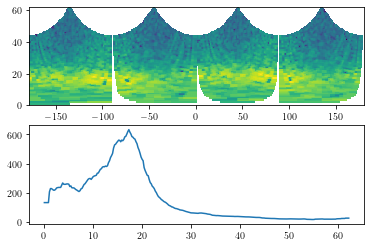

In [57]:
%matplotlib inline

plt.subplot(2,1,1)
I_t, q_t, phi_t = pseudo_ai.integrate2d(mfm, 300, unit='q_nm^-1', mask = mfm_mask, correctSolidAngle=False)
plt.pcolormesh(phi_t, q_t*1e3, I_t.T, norm=matplotlib.colors.LogNorm())




plt.subplot(2,1,2)
arg = np.argmax(I_mfm)
print('q_max = %.2f um' % (q_mfm[arg]*1e3))
plt.plot(q_mfm*1e3, I_mfm)

In [79]:
def g(x, k, theta, a,):
    return a*x**(k-1)*np.exp(-x/theta)/(theta**k*scipy.special.gamma(k))

[[Model]]
    Model(g)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 100
    # variables        = 3
    chi-square         = 4.26166279
    reduced chi-square = 0.04393467
    Akaike info crit   = -309.551078
    Bayesian info crit = -301.735567
[[Variables]]
    k:      9.46829657 +/- 0.45280047 (4.78%) (init = 4)
    theta:  1.92700251 +/- 0.09356114 (4.86%) (init = 18.75)
    a:      39.3794043 +/- 0.75362943 (1.91%) (init = 4)
[[Correlations]] (unreported correlations are < 0.100)
    C(k, theta) = -0.991
    C(theta, a) =  0.725
    C(k, a)     = -0.716
q_max = 18.245431303716625 +- 2


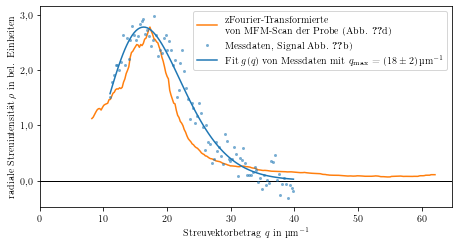

In [192]:
%matplotlib inline
#qs = px_to_q(rad)*1e-3
fig = plt.figure(figsize=(6.48,3.5))
axis = fig.gca()
axis.set_xlabel('Streuvektorbetrag $q$ in $\\si{\\micro\\meter^{-1}}$')
axis.set_ylabel('radiale Streuintensität $\\rho$ in bel. Einheiten')
labels = ['vertikalen', 'horizontalen']
colors = ['#00FFFF', '#ff69b4']

q_whole = q_360*1e3
I_whole = I_360

axis.errorbar(q_whole, I_whole, fmt='o', markerfacecolor='C0', alpha=0.6, markeredgewidth=0, ms=3, label='Messdaten, Signal Abb. \\ref{{fig:th-100-200-maske-radial-transform}}b)')

mod_g = Model(g)
params_g = mod_g.make_params()
params_g.add('k', value=4., min=1, max=100)
params_g.add('theta', value=18.75, min=0.1, max=100)
params_g.add('a', value=4, min = 0)

    
result_g = mod_g.fit(I_whole, params=params_g, x=q_whole)
print(result_g.fit_report())
best_k = result_g.best_values['k']
best_theta = result_g.best_values['theta']
qmax = (best_k * best_theta)
qmax_stderr = qmax * (result_g.params['k'].stderr/best_k + result_g.params['theta'].stderr/best_theta)
print(f'q_max = {qmax} +- {qmax_stderr:1.0f}')
axis.errorbar(q_whole, result_g.best_fit, color='C0',  label=f"Fit $g(q)$ von Messdaten mit $q_\\text{{max}}$ = \\SI{{{qmax:.0f}({qmax_stderr:.0f})}}{{\\per\\micro\\meter}}")

q_mfm_um = q_mfm*1e3

args = np.argwhere(np.logical_and(q_mfm_um > 8, True))
q_mfm_um = q_mfm_um[args]
I_mfm_um = I_mfm[args] 
axis.plot(q_mfm_um, I_mfm_um/np.max(I_mfm_um)*np.max(result_g.best_fit), label='zFourier-Transformierte\n von MFM-Scan der Probe (Abb. \\ref{fig:mfm-amplitude-ft}d)')

axis.legend()
axis.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '\\num{%1.1f}' % x))
axis.yaxis.set_major_locator(MultipleLocator(1))
axis.axhline(0, color='black', linewidth=1)
axis.set_xlim(0)
fig.tight_layout()

In [175]:
fig.savefig(plots_output_path + 'radial_integral_fits.pgf',bbox_inches='tight', pad_inches=0.1, dpi=500)

In [173]:
fig.savefig('pyfai_output_360grad.png', pad_inches=0.1, dpi=500, facecolor='white', transparent=False)

[[Model]]
    Model(g)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 54
    # data points      = 50
    # variables        = 3
    chi-square         = 3.45853918
    reduced chi-square = 0.07358594
    Akaike info crit   = -127.558835
    Bayesian info crit = -121.822766
[[Variables]]
    k:      11.4484983 +/- 1.01419411 (8.86%) (init = 4)
    theta:  1.58848035 +/- 0.14340138 (9.03%) (init = 18.75)
    a:      34.8307258 +/- 1.25086572 (3.59%) (init = 100)
[[Correlations]] (unreported correlations are < 0.100)
    C(k, theta) = -0.992
    C(theta, a) =  0.695
    C(k, a)     = -0.685
q_max = 18.1857145194483 +- 3
[[Model]]
    Model(g)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 65
    # data points      = 50
    # variables        = 3
    chi-square         = 3.71308529
    reduced chi-square = 0.07900181
    Akaike info crit   = -124.007993
    Bayesian info crit = -118.271924
[[Variables]]
    k:      7.81394845 +/- 

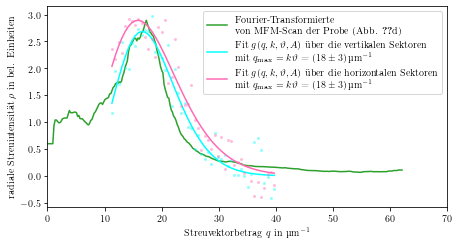

In [108]:
%matplotlib inline
#qs = px_to_q(rad)*1e-3
fig = plt.figure(figsize=(6.48,3.5))
axis = fig.gca()
axis.set_xlabel('Streuvektorbetrag $q$ in $\\si{\\micro\\meter^{-1}}$')
axis.set_ylabel('radiale Streuintensität $\\rho$ in bel. Einheiten')
labels = ['vertikalen', 'horizontalen']
colors = ['#00FFFF', '#ff69b4']

qs = [q_ver, q_hor]

Is = [I_ver, I_hor]

maximal_values = []

for q_iterate, I_iterate, color, sektor in zip(qs, Is, colors, labels):
    
    q_iterate = q_iterate*1e3
    
    axis.errorbar(q_iterate, I_iterate, fmt='o', markerfacecolor=f'{color}70', markeredgewidth=0, ms=3)
    
    mod_g = Model(g)
    params_g = mod_g.make_params()
    params_g.add('k', value=4., min=1, max=100)
    params_g.add('theta', value=18.75, min=0.1, max=100)
    params_g.add('a', value=1e2, min = 0)
    
    result_g = mod_g.fit(I_iterate, params=params_g, x=q_iterate)
    print(result_g.fit_report())
    best_k = result_g.best_values['k']
    best_theta = result_g.best_values['theta']
    qmax = (best_k * best_theta)
    qmax_stderr = qmax * (result_g.params['k'].stderr/best_k + result_g.params['theta'].stderr/best_theta)
    print(f'q_max = {qmax} +- {qmax_stderr:1.0f}')
    axis.errorbar(q_iterate, result_g.best_fit, color=color,  label=f"Fit $g(q, k, \\vartheta, A)$ über die {sektor} Sektoren\n mit $q_\\text{{max}} = k\\vartheta$ = \\SI{{{qmax:.0f}({qmax_stderr:.0f})}}{{\\per\\micro\\meter}}")
    
axis.plot(q_mfm*1e3, I_mfm/np.max(I_mfm)*np.max(result_g.best_fit), label='Fourier-Transformierte\n von MFM-Scan der Probe (Abb. \\ref{fig:mfm-amplitude-ft}d)')

axis.set_xlim(0,70)
axis.legend()
fig.tight_layout()

In [109]:
fig.savefig('pyfai_output.png', pad_inches=0.1, dpi=500, facecolor='white', transparent=False)

In [53]:
radiuses = [np.arange(0,170) for x in range(0,4)]
partial_sums = [image_polar[45:135].sum(axis=0), image_polar[135:225].sum(axis=0), image_polar[225:315].sum(axis=0), np.concatenate([image_polar[315:360], image_polar[0:45]]).sum(axis=0)]


<IPython.core.display.Javascript object>


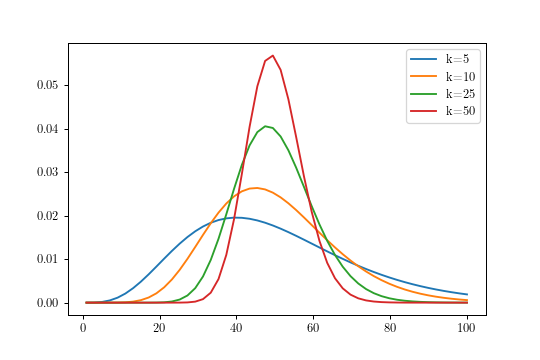

In [54]:
%matplotlib notebook
x = np.linspace(1, 100)
plt.plot(x, g(x, 5, 10,1), label='k=5')
plt.plot(x, g(x,10, 5,1), label='k=10')
plt.plot(x, g(x,25, 2,1), label='k=25')
plt.plot(x, g(x,50, 1,1), label='k=50')

plt.legend()

In [55]:
rad_mfm = np.load('/Users/lunin/Dropbox/mbi/bachelorarbeit/python_notebooks/mfm/rad_ft_transform_radial.npy')

In [56]:
a = rad_mfm.sum(axis=0)
rad_mfm = np.arange(0,50)

In [57]:
double_radiuses = [np.arange(0,170) for x in range(0,2)]
double_sums = [partial_sums[0] + partial_sums[2], partial_sums[1] + partial_sums[3]]

[[Model]]
    Model(g)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 79
    # variables        = 3
    chi-square         = 5.5865e-14
    reduced chi-square = 7.3507e-16
    Akaike info crit   = -2749.93732
    Bayesian info crit = -2742.82898
[[Variables]]
    k:      7.74225929 +/- 0.44910772 (5.80%) (init = 4)
    theta:  2.57034177 +/- 0.15129731 (5.89%) (init = 18.75)
    a:      6.0358e-06 +/- 1.3589e-07 (2.25%) (init = 0.001)
[[Correlations]] (unreported correlations are < 0.100)
    C(k, theta) = -0.993
    C(theta, a) =  0.858
    C(k, a)     = -0.854
q_max = 19.900252440902598 +- 2
[[Model]]
    Model(g)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 79
    # variables        = 3
    chi-square         = 7.7111e-14
    reduced chi-square = 1.0146e-15
    Akaike info crit   = -2724.47490
    Bayesian info crit = -2717.36656
[[Variables]]
    k:      6.59171423 

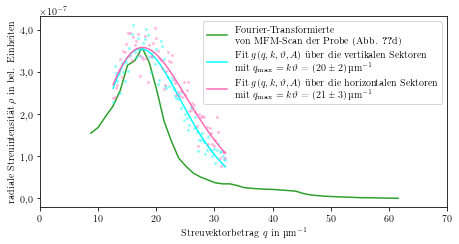

In [73]:
%matplotlib inline
#qs = px_to_q(rad)*1e-3
fig = plt.figure(figsize=(6.48,3.5))
axis = fig.gca()
axis.set_xlabel('Streuvektorbetrag $q$ in $\\si{\\micro\\meter^{-1}}$')
axis.set_ylabel('radiale Streuintensität $\\rho$ in bel. Einheiten')
labels = ['vertikalen', 'horizontalen']
colors = ['#00FFFF', '#ff69b4']

for rad, psum, color, sektor in zip(double_radiuses, double_sums, colors, labels):
    args = np.argwhere(np.logical_and(rad > 50, rad < 130))
    rad = rad[args][:,0]
    psum = psum[args][:,0]
    
    
    new_x = px_to_q_um(rad)
    axis.errorbar(new_x, psum, fmt='o', markerfacecolor=f'{color}70', markeredgewidth=0, ms=3)
    
    mod_g = Model(g)
    params_g = mod_g.make_params()
    params_g.add('k', value=4., min=1, max=100)
    params_g.add('theta', value=18.75, min=0.1, max=100)
    params_g.add('a', value=1e-3, min = 0)
    
    result_g = mod_g.fit(psum, params=params_g, x=new_x)
    print(result_g.fit_report())
    best_k = result_g.best_values['k']
    best_theta = result_g.best_values['theta']
    qmax = (best_k * best_theta)
    qmax_stderr = qmax * (result_g.params['k'].stderr/best_k + result_g.params['theta'].stderr/best_theta)
    print(f'q_max = {qmax} +- {qmax_stderr:1.0f}')
    axis.errorbar(new_x, result_g.best_fit, color=color,  label=f"Fit $g(q, k, \\vartheta, A)$ über die {sektor} Sektoren\n mit $q_\\text{{max}} = k\\vartheta$ = \\SI{{{qmax:.0f}({qmax_stderr:.0f})}}{{\\per\\micro\\meter}}")
axis.yaxis.set_major_formatter(OOMFormatter(-7))
x_axis_sim = rad_mfm*2*np.pi/5.
print(2*np.pi/5)
args = np.argwhere(x_axis_sim > 8)
axis.plot(x_axis_sim[args], a[args]/np.max(a)*np.max(result_g.best_fit), label='Fourier-Transformierte\n von MFM-Scan der Probe (Abb. \\ref{fig:mfm-amplitude-ft}d)')

print(x_axis_sim[np.argmax(a)])
axis.set_xlim(0,70)
axis.legend()
fig.tight_layout()

In [74]:
fig.savefig(plots_output_path + 'radial_integral_fits.pgf',bbox_inches='tight', pad_inches=0.1, dpi=500)

In [83]:
fig.savefig('radial_int_fit_area_short.png',bbox_inches='tight', pad_inches=0.1, dpi=500, facecolor='white', transparent=False)

## Clustering

C:\Users\lunin\AppData\Local\Temp/ipykernel_24040/793205886.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


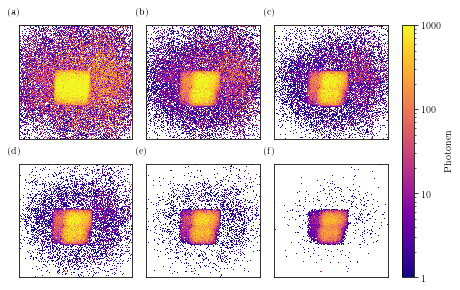

In [130]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'cl_2_th_150_resonance/single_count_mask_cl_2_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_180_resonance/single_count_mask_cl_2_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_200_resonance/single_count_mask_cl_2_th_200_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_220_resonance/single_count_mask_cl_2_th_220_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_250_resonance/single_count_mask_cl_2_th_250_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_290_resonance/single_count_mask_cl_2_th_290_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)


letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True)

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Photonen')
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()


In [131]:
fig.savefig(plots_output_path + 'cl_2_150_180_200_220_250_290_resonance.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_24040/100662026.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


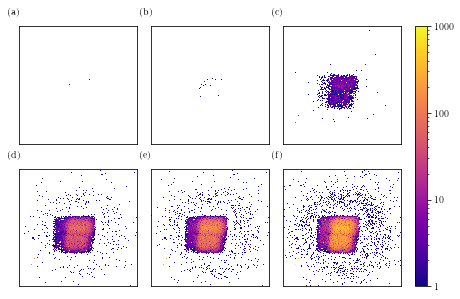

In [132]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_1.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_5.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_1000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_10000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_20000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()


In [ ]:
fig.savefig(plots_output_path + 'th_150_sums.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_24040/469254089.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


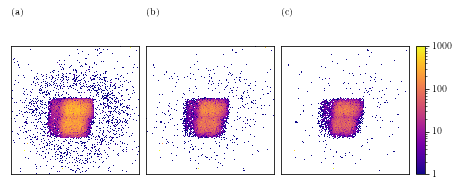

In [133]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.1, 0.25),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(0, 300, letter)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)
ticklabs = cb.ax.get_yticklabels()
for t in ticklabs:
    t.set_verticalalignment('center')

fig.tight_layout()

In [ ]:
fig.savefig(plots_output_path + 'th_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

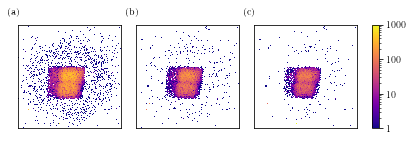

In [134]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

#fig.tight_layout()

In [ ]:
fig.savefig(plots_output_path + 'th_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_24040/4180074362.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


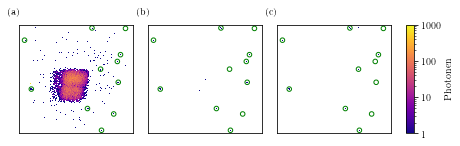

In [135]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
image1 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_450_sum_50000.tiff')
image = image[80:320, 80:320]
image2 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_600_sum_50000.tiff')
image = image[80:320, 80:320]
image2 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']
spots = [(28,98), (162,233), (218,159), (183, 7), (181,142), (220,113), (210,43), (13,206),  (152,55), (236,232), (225,174)]

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )
    for spot in spots:
        circle = matplotlib.patches.Circle(spot, radius=5, fill=False, ec='green')
        axis.add_patch(circle)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Photonen')
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()

In [ ]:
fig.savefig(plots_output_path + 'th_180_450_600.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

# Off resonance

## Thresholding

C:\Users\lunin\AppData\Local\Temp/ipykernel_24040/976934769.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


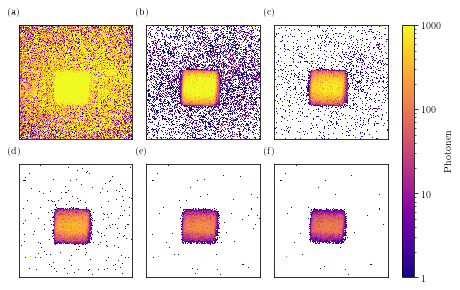

In [136]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_50_off_resonance/single_count_mask_only_th_50_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_100_off_resonance/single_count_mask_only_th_100_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_125_off_resonance/single_count_mask_only_th_125_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_off_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_off_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_off_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Photonen')
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)
fig.tight_layout()


In [ ]:
fig.savefig(plots_output_path + 'th_50_100_125_150_170_180_off_resonance.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

## Clustering

C:\Users\lunin\AppData\Local\Temp/ipykernel_24040/15107790.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


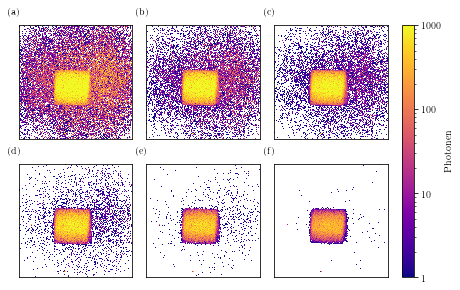

In [137]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'cl_2_th_150_off_resonance/single_count_mask_cl_2_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_180_off_resonance/single_count_mask_cl_2_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_200_off_resonance/single_count_mask_cl_2_th_200_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_220_off_resonance/single_count_mask_cl_2_th_220_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_250_off_resonance/single_count_mask_cl_2_th_250_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_290_off_resonance/single_count_mask_cl_2_th_290_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Photonen')
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)
fig.tight_layout()


In [138]:
fig.savefig(plots_output_path + 'cl_150_180_200_220_250_290_off_resonance.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

# dark images

<IPython.core.display.Javascript object>


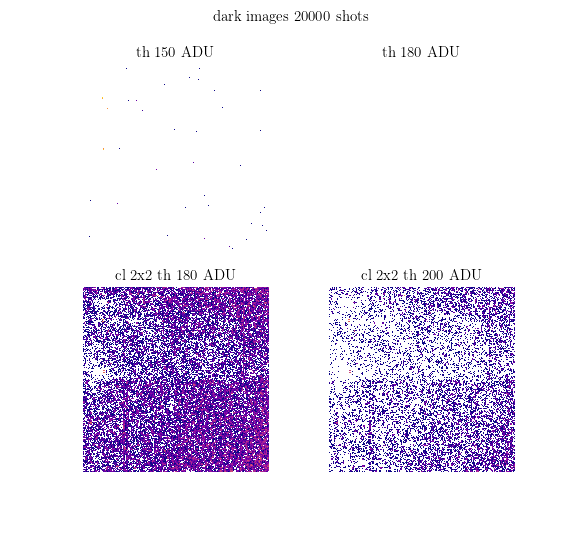

In [20]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('dark images 20000 shots')
cmap = matplotlib.cm.get_cmap('plasma').copy()

axe = fig.add_subplot(2,2,1)
axe.set_title('th 150 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/th_150_dark_capture/single_count_mask_only_th_150_sum_25000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,2)
axe.set_title('th 180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
#image = imread('bachelorarbeit/220501_pictures/scattering/th_180_off_resonance/')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
#im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,3)
axe.set_title('cl 2x2 th 180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/cl_2_th_180_dark_capture/single_count_mask_cl_2_th_180_sum_10000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,4)
axe.set_title('cl 2x2 th 200 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/cl_2_th_200_dark_capture/single_count_mask_cl_2_th_200_sum_10000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
#fig.savefig('test_ring.png', dpi=300, transparent=False)

# Histograms

In [148]:
hist_bins, noise_raw, noise_cl2, noise_cl3 =  np.loadtxt(data_path + 'noise_hist_070322.csv', delimiter=",", unpack=True)
hist_bins, signal_raw, signal_cl2, signal_cl3 =  np.loadtxt(data_path + 'signal_hist_070322.csv', delimiter=",", unpack=True)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 199
    # variables        = 3
    chi-square         = 3.1460e+12
    reduced chi-square = 1.6051e+10
    Akaike info crit   = 4679.28306
    Bayesian info crit = 4689.16297
[[Variables]]
    amplitude:  1.5884e+09 +/- 1304690.35 (0.08%) (init = 2.155606e+09)
    center:    -0.32332653 +/- 0.01891634 (5.85%) (init = -0.5)
    sigma:      19.9445019 +/- 0.01891635 (0.09%) (init = 22.5)
    fwhm:       46.9657120 +/- 0.04454459 (0.09%) == '2.3548200*sigma'
    height:     31772329.8 +/- 26097.2011 (0.08%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) =  0.577
19.944501922306635


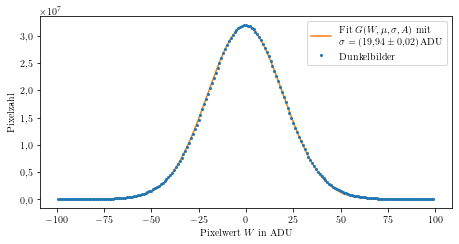

In [150]:
%matplotlib inline
mod = GaussianModel()
fig = plt.figure(figsize=(6.48,3.5))
axis = fig.gca()
x,y = hist_bins, noise_raw

args = np.argwhere(np.logical_and((x < 100), (x > -100)))
x = x[args][:,0]
y = y[args][:,0]


#plt.plot(radius, azimutal_integrated)
axis.errorbar(x, y, fmt='o', markersize=2, label='Dunkelbilder')
params = mod.guess(x=x, data=y)
result = mod.fit(y, params=params, x=x)
print(result.fit_report())
axis.plot(x, result.best_fit, label='Fit $G(W, \mu, \sigma, A)$ mit\n$\\sigma = \\SI{19.94(2)}{\\adu}$')
#plt.axvline(84.24, color = 'green', label='expected $r_{M4} =$ \\SI{2.10}{\\milli\\meter} (84{,}8px) ring radius')
print(result.best_values['sigma'])
axis.set_xlabel(r'Pixelwert $W$ in ADU')
axis.set_ylabel('Pixelzahl')
axis.yaxis.set_major_formatter(OOMFormatter(7))
axis.legend()
fig.tight_layout()


In [151]:
fig.savefig(plots_output_path + 'noise_hist_fit.pgf',bbox_inches='tight', pad_inches=0.1, dpi=500)

In [15]:
noises = (noise_raw, noise_cl2, noise_cl3)
signals = (signal_raw, signal_cl2, signal_cl3)

[50.0, 75.0, 100.0, 125.0, 150.0, 175.0, 72.0]
[100.0, 200.0, 300.0, 400.0, 500.0, 171.0]
[200.0, 300.0, 400.0, 500.0, 600.0, 277.0]


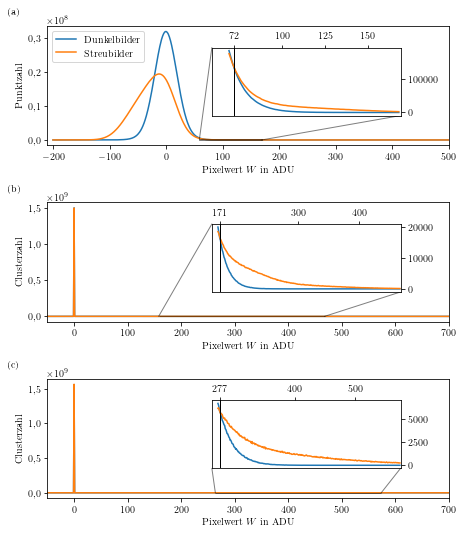

In [16]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
axes = fig.subplots(3,1)
titles = ('no processing', 'clustering 2x2', 'clustering 3x3')
c = 0
letters = ['(a)', '(b)', '(c)']
orders = [8, 9,9]
lims = [(-210,500), (-50, 700), (-50, 700)]
ylabels = ["Punktzahl", "Clusterzahl", "Clusterzahl"]
for axis, noise, signal, title, letter, order, lim, ylabel in zip(axes, noises, signals, titles, letters, orders, lims, ylabels):
    norm_coef = 1
    #norm_coef = max(np.max(noise), np.max(signal))
    noise = noise/norm_coef
    signal = signal/norm_coef
    axis.plot(hist_bins, noise, ms=2, color='C0', label=r'Dunkelbilder')
    axis.plot(hist_bins, signal, ms=2, color='C1', label=r'Streubilder')
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    axis.set_xlim(lim)
    axis.yaxis.set_major_formatter(OOMFormatter(order=order))
    #axis.set_title(title)
    axis.set_ylabel(ylabel) # r"\begin{tabular}{c}Transmissions-\\ mittelwertsrate $\bar{\text{T}}$\end{tabular}"
    axins = axis.inset_axes([0.41, 0.25, 0.47, 0.57])
    args = np.argwhere(np.logical_and(signal >  noise, np.logical_and( hist_bins > 70, hist_bins < 450)))
    intersection_x = np.min(args)
    min_arg = intersection_x - 3   
    
    max_arg = min_arg + 300
    if c == 0:
        max_arg = min_arg + 100
    axins.plot(hist_bins[min_arg:max_arg], noise[min_arg:max_arg], ms=2, color='C0', label=r'noise')
    axins.plot(hist_bins[min_arg:max_arg], signal[min_arg:max_arg], ms=2, color='C1', label=r'signal')
    
    print(axins.get_xticks().tolist() + [hist_bins[intersection_x]])
    #axins.set_xticks()
    ticks = axins.get_xticks()
    ticks[1] = hist_bins[intersection_x]
    axins.set_xticks(ticks)
    axins.set_xlim(hist_bins[min_arg]-10, hist_bins[max_arg])
    axins.axvline(hist_bins[intersection_x], linestyle="-",color='black', linewidth=1, alpha=1)
    axins.xaxis.set_label_position('top')
    axins.xaxis.tick_top()
    axins.yaxis.set_label_position("right")
    axins.yaxis.tick_right()
    #axins.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.1e}" % x if x != 0 else "0"))
    axis.indicate_inset_zoom(axins, edgecolor="black")
    axis.set_xlabel(r'Pixelwert $W$ in ADU')
    #axis.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.1e}" % x if x != 0 else "0"))
    c+=1
    #axis.legend()
#axes.set_title('Soft X-Ray Range')
#axes.set_xlabel(r'Wiederholungszahl $N$ der Probe Ta(\SI{3}{\nano\meter})/[Fe(\SI{0.41}{\nano\meter})/Gd(\SI{0.45}{\nano\meter})]$_{\text{x}N}$/Ta(\SI{2}{\nano\meter})')
#axes.set_xscale('log')
#axes.set_ylabel(r"\begin{tabular}{c}Transmissions-\\ mittelwertsrate $\bar{\text{T}}$\end{tabular}")

#axes.grid(which='major')
#axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))

# axes.xaxis.set_major_locator(FixedLocator(ticks))
# axes.xaxis.set_minor_locator(FixedLocator(subticks))
# axes.xaxis.set_major_formatter(NullFormatter())
# axes.set_ylim(0,1)
# axes.yaxis.set_major_locator(MultipleLocator(0.25))
# axes.set_xlim(0.2, 200.8)


# axes.yaxis.set_minor_locator(AutoMinorLocator(5))

#axes.set_title('Soft X-Ray Range')
#axes.set_xlabel(r'Wiederholungszahl $N$ der Probe Ta(\SI{3}{\nano\meter})/[Fe(\SI{0.41}{\nano\meter})/Gd(\SI{0.45}{\nano\meter})]$_{\text{x}N}$/Ta(\SI{2}{\nano\meter})')
#axes.set_xscale('log')
#axes.set_ylabel(r"\begin{tabular}{c}Polarisa-\\ tionsrate P\end{tabular}")

#axes.grid(which='major')
#axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(FixedLocator(ticks))
# axes.xaxis.set_minor_locator(FixedLocator(subticks))
# axes.xaxis.set_major_formatter(NullFormatter())
# axes.yaxis.set_major_locator(MultipleLocator(0.25))
# axes.set_xlim(0.2, 200.8)


# axes.yaxis.set_minor_locator(AutoMinorLocator(5))

axis = axes[2]
#axes.set_title('Soft X-Ray Range')
#axes.yaxis.set_label_position("right")
#axes.yaxis.tick_right()

#axes.set_xscale('log')
#axes.set_ylabel(r"\begin{tabular}{c}Gütezahlrate TP$^2$\end{tabular}")

#axes.grid(which='major')
#axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(FixedLocator(ticks))
# axes.xaxis.set_minor_locator(FixedLocator(subticks))
# axes.yaxis.set_major_locator(MultipleLocator(0.25))
# axes.set_xlim(0.2, 200.8)

fig.subplots_adjust(hspace=0.5)

# axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_major_locator(MultipleLocator(50))
fig.tight_layout()
axes[0].legend()

In [ ]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
axes = fig.subplots(3,1)
titles = ('no processing', 'clustering 2x2', 'clustering 3x3')
c = 0
letters = ['(a)', '(b)', '(c)']
orders = [8, 9,9]
lims = [(-210,500), (-50, 700), (-50, 700)]
ylabels = ["Punktzahl", "Clusterzahl", "Clusterzahl"]
for axis, noise, signal, title, letter, order, lim, ylabel in zip(axes, noises, signals, titles, letters, orders, lims, ylabels):
    norm_coef = 1
    #norm_coef = max(np.max(noise), np.max(signal))
    noise = noise/norm_coef
    signal = signal/norm_coef
    axis.plot(hist_bins, noise, ms=2, color='C0', label=r'Dunkelbilder')
    axis.plot(hist_bins, signal, ms=2, color='C1', label=r'Streubilder')
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    axis.set_xlim(lim)
    axis.yaxis.set_major_formatter(OOMFormatter(order=order))
    #axis.set_title(title)
    axis.set_ylabel(ylabel) # r"\begin{tabular}{c}Transmissions-\\ mittelwertsrate $\bar{\text{T}}$\end{tabular}"
    axins = axis.inset_axes([0.41, 0.25, 0.47, 0.57])
    args = np.argwhere(np.logical_and(signal >  noise, np.logical_and( hist_bins > 70, hist_bins < 450)))
    intersection_x = np.min(args)
    min_arg = intersection_x - 3   
    
    max_arg = min_arg + 300
    if c == 0:
        max_arg = min_arg + 100
    axins.plot(hist_bins[min_arg:max_arg], noise[min_arg:max_arg], ms=2, color='C0', label=r'noise')
    axins.plot(hist_bins[min_arg:max_arg], signal[min_arg:max_arg], ms=2, color='C1', label=r'signal')
    
    print(axins.get_xticks().tolist() + [hist_bins[intersection_x]])
    #axins.set_xticks()
    ticks = axins.get_xticks()
    ticks[1] = hist_bins[intersection_x]
    axins.set_xticks(ticks)
    axins.set_xlim(hist_bins[min_arg]-10, hist_bins[max_arg])
    axins.axvline(hist_bins[intersection_x], linestyle="-",color='black', linewidth=1, alpha=1)
    axins.xaxis.set_label_position('top')
    axins.xaxis.tick_top()
    axins.yaxis.set_label_position("right")
    axins.yaxis.tick_right()
    #axins.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.1e}" % x if x != 0 else "0"))
    axis.indicate_inset_zoom(axins, edgecolor="black")
    axis.set_xlabel(r'Pixelwert $W$ in ADU')
    #axis.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.1e}" % x if x != 0 else "0"))
    c+=1
    #axis.legend()
#axes.set_title('Soft X-Ray Range')
#axes.set_xlabel(r'Wiederholungszahl $N$ der Probe Ta(\SI{3}{\nano\meter})/[Fe(\SI{0.41}{\nano\meter})/Gd(\SI{0.45}{\nano\meter})]$_{\text{x}N}$/Ta(\SI{2}{\nano\meter})')
#axes.set_xscale('log')
#axes.set_ylabel(r"\begin{tabular}{c}Transmissions-\\ mittelwertsrate $\bar{\text{T}}$\end{tabular}")

#axes.grid(which='major')
#axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))

# axes.xaxis.set_major_locator(FixedLocator(ticks))
# axes.xaxis.set_minor_locator(FixedLocator(subticks))
# axes.xaxis.set_major_formatter(NullFormatter())
# axes.set_ylim(0,1)
# axes.yaxis.set_major_locator(MultipleLocator(0.25))
# axes.set_xlim(0.2, 200.8)


# axes.yaxis.set_minor_locator(AutoMinorLocator(5))

#axes.set_title('Soft X-Ray Range')
#axes.set_xlabel(r'Wiederholungszahl $N$ der Probe Ta(\SI{3}{\nano\meter})/[Fe(\SI{0.41}{\nano\meter})/Gd(\SI{0.45}{\nano\meter})]$_{\text{x}N}$/Ta(\SI{2}{\nano\meter})')
#axes.set_xscale('log')
#axes.set_ylabel(r"\begin{tabular}{c}Polarisa-\\ tionsrate P\end{tabular}")

#axes.grid(which='major')
#axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(FixedLocator(ticks))
# axes.xaxis.set_minor_locator(FixedLocator(subticks))
# axes.xaxis.set_major_formatter(NullFormatter())
# axes.yaxis.set_major_locator(MultipleLocator(0.25))
# axes.set_xlim(0.2, 200.8)


# axes.yaxis.set_minor_locator(AutoMinorLocator(5))

axis = axes[2]
#axes.set_title('Soft X-Ray Range')
#axes.yaxis.set_label_position("right")
#axes.yaxis.tick_right()

#axes.set_xscale('log')
#axes.set_ylabel(r"\begin{tabular}{c}Gütezahlrate TP$^2$\end{tabular}")

#axes.grid(which='major')
#axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(FixedLocator(ticks))
# axes.xaxis.set_minor_locator(FixedLocator(subticks))
# axes.yaxis.set_major_locator(MultipleLocator(0.25))
# axes.set_xlim(0.2, 200.8)

fig.subplots_adjust(hspace=0.5)

# axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_major_locator(MultipleLocator(50))
fig.tight_layout()
axes[0].legend()

In [ ]:
fig.savefig(plots_output_path + 'no_pr_cl_2_cl_3_histograms.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

# rzp_phi <=> eV

In [12]:
rzp_phi_1, smb_1_1, smb_2_1 =  np.loadtxt('rzp_phi_ev/rzp_phi_data_7.spec', delimiter=" ", unpack=True, usecols=[1, 8, 9])
rzp_phi_2, smb_1_2, smb_2_2 =  np.loadtxt('rzp_phi_ev/rzp_phi_data_9.spec', delimiter=" ", unpack=True, usecols=[1, 8, 9])
rzp_phi = np.concatenate((rzp_phi_1, rzp_phi_2))
smb_1 = np.concatenate((smb_1_1, smb_1_2))
smb_2 = np.concatenate((smb_2_1, smb_2_2))
print(np.min(rzp_phi), np.max(rzp_phi))
print((rzp_phi - np.roll(rzp_phi, -1)))

-111.504016 -49.997579
[ 5.0373400e-01  4.9963700e-01  4.9971200e-01  4.9813800e-01
  5.0371200e-01  5.0078000e-01  4.9778800e-01  5.0296300e-01
  4.9416700e-01  5.0493900e-01  4.9895400e-01  5.0096100e-01
  5.0121700e-01  4.9626000e-01  5.0100900e-01  5.0230000e-01
  4.9656200e-01  5.0057600e-01  4.9706500e-01  5.0351700e-01
  5.0222700e-01  4.9937600e-01  5.0095500e-01  4.9504500e-01
  5.0066000e-01  4.9999500e-01  5.0075700e-01  4.9979000e-01
  4.9975000e-01  5.0196300e-01  5.0084400e-01  4.9649100e-01
  5.0482400e-01  5.0062800e-01  4.9546200e-01  5.0187200e-01
  5.0159600e-01  5.0004000e-01  4.9944300e-01  4.9719600e-01
  5.0276100e-01  4.9981200e-01  5.0191500e-01  4.9520500e-01
  5.0021200e-01  5.0199100e-01  5.0109400e-01  4.9727600e-01
  5.0356700e-01  4.9597300e-01  5.0209700e-01  5.0185100e-01
  4.9903500e-01  5.0073800e-01  4.9639100e-01  5.0148100e-01
  5.0136500e-01  5.0029500e-01  4.9862000e-01  4.9763100e-01
  3.2800000e-04  4.9845400e-01  5.0383200e-01  4.9621500e-01
 

In [13]:
ev_gd_beta_par, gd_beta_par = np.loadtxt('rzp_phi_ev/gd_beta_par.csv', delimiter="; ", unpack=True)
ev_gd_beta_antipar, gd_beta_antipar = np.loadtxt('rzp_phi_ev/gd_beta_antipar.csv', delimiter="; ", unpack=True)

args = np.argsort(ev_gd_beta_par)
ev_gd_beta_par = ev_gd_beta_par[args]
gd_beta_par = gd_beta_par[args]

args = np.argsort(ev_gd_beta_antipar)
ev_gd_beta_antipar = ev_gd_beta_antipar[args]
gd_beta_antipar = gd_beta_antipar[args]


ev_gd_conc = np.concatenate((ev_gd_beta_par, ev_gd_beta_antipar))
ev_gd_min = np.min(ev_gd_conc)
ev_gd_max = np.max(ev_gd_conc)
print(ev_gd_min, ev_gd_max)

cont_ev_gd = np.linspace(ev_gd_min, ev_gd_max, 200)

gd_beta_par_interp = np.interp(cont_ev_gd, ev_gd_beta_par, gd_beta_par)
gd_beta_antipar_interp = np.interp(cont_ev_gd, ev_gd_beta_antipar, gd_beta_antipar)
gd_beta_avg_interp = 0.5*gd_beta_par_interp + 0.5*gd_beta_antipar_interp

1160.647571606476 1229.2403486924036


<IPython.core.display.Javascript object>


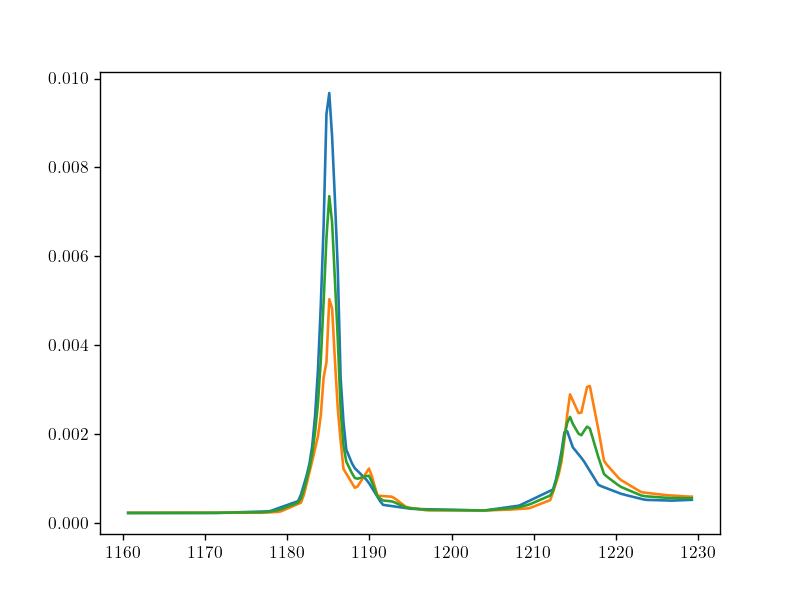

In [14]:
%matplotlib notebook
plt.plot(cont_ev_gd, gd_beta_par_interp)
#plt.scatter(ev_gd_beta_par, gd_beta_par)
plt.plot(cont_ev_gd, gd_beta_antipar_interp)
plt.plot(cont_ev_gd, gd_beta_avg_interp)

In [15]:
#Annahme: rzp_phi = -67 -> Gd M5 = 1185eV, rzp_phi = -87 -> 1215 eV
a = -3./2.
b = 2169./2.

#Annahme rzp phi -67 -> Gd M5 1184.79, rzp_phi - 87 -> 1215
#a = -1.65
#b = 1074.24
def rzp_phi_to_ev(rzp_phi):
    return a*rzp_phi + b

def ev_to_rzp_phi(ev):
    return (ev-b)/a

In [16]:
rzp_phi_to_ev(-51)

1161.0

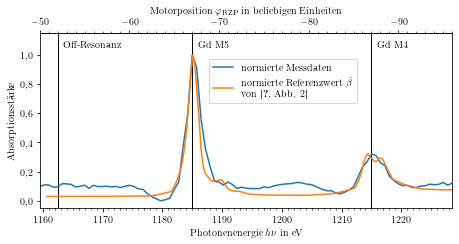

In [18]:
%matplotlib inline
fig = plt.figure(figsize=(6.48,3.5))
axis = fig.gca()
signal = smb_2/smb_1
signal_norm = signal-np.min(signal)

signal_norm = signal_norm/np.max(signal_norm)

args = np.argwhere(np.logical_and(rzp_phi > ev_to_rzp_phi(ev_gd_max), 1)) 

rzp_phi_short = rzp_phi[args]
signal_norm_short = signal_norm[args]

rzp_phi_measurements = np.array([-67, -87, -52])

e_measurements = rzp_phi_to_ev(rzp_phi_measurements)

rzp_phi_labels = ['Gd M5', 'Gd M4', 'Off-Resonanz']
axis.set_xlabel('Photonenenergie $h\\nu$ in eV')
axis.set_ylim(-0.05, 1.15)
axis.set_xlim(np.min(rzp_phi_to_ev(rzp_phi_short)), np.max(rzp_phi_to_ev(rzp_phi_short)))
axis.xaxis.set_minor_locator(MultipleLocator(1))
for rzp_phi_meas, rzp_phi_label in zip(e_measurements, rzp_phi_labels):
    axis.axvline(rzp_phi_meas, linestyle="-", color='black', linewidth=1, alpha=1)
    axis.text(rzp_phi_meas + .9, 1.05, rzp_phi_label, ha='left')

axis.plot(rzp_phi_to_ev(rzp_phi_short), signal_norm_short, label='normierte Messdaten')
axis.set_ylabel('Absorptionsstärke')

secax = axis.secondary_xaxis('top', functions=(ev_to_rzp_phi, rzp_phi_to_ev))
secax.set_xlabel('Motorposition $\\varphi_{\\text{RZP}}$ in beliebigen Einheiten')
#secax.xaxis.set_major_locator(MultipleLocator(5))
secax.xaxis.set_minor_locator(MultipleLocator(1))

axis.plot(cont_ev_gd,gd_beta_avg_interp/np.max(gd_beta_avg_interp), label='normierte Referenzwert $\\bar{\\beta}$\nvon \\cite[Abb. 2]{prieto-x-ray-2005}')
#axis.plot(ev_to_rzp_phi(cont_ev_gd), gd_beta_par_interp/np.max(gd_beta_par_interp))
axis.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.1f}" % x))
axis.legend(loc=(0.41,0.6))


fig.tight_layout()

In [ ]:
fig.savefig('rzp_phi_ev_additional_ticks.jpg', dpi=500)

In [19]:
fig.savefig(plots_output_path + 'rzp_phi_ev.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

In [53]:
fig.savefig(plots_output_path + 'qe_fehldetektiert_signal_noise.pgf',bbox_inches='tight', pad_inches=0.1, dpi=500)

# Hotspots 5x5 areas 100 th

In [12]:
hotspots = np.load('5x5_hotspots_with_100_th.npy')
hotspots.shape

(534, 5, 5)

In [13]:
hotspots_average = np.average(hotspots, axis=0)
hotspots_std = np.std(hotspots, axis=0)

<IPython.core.display.Javascript object>


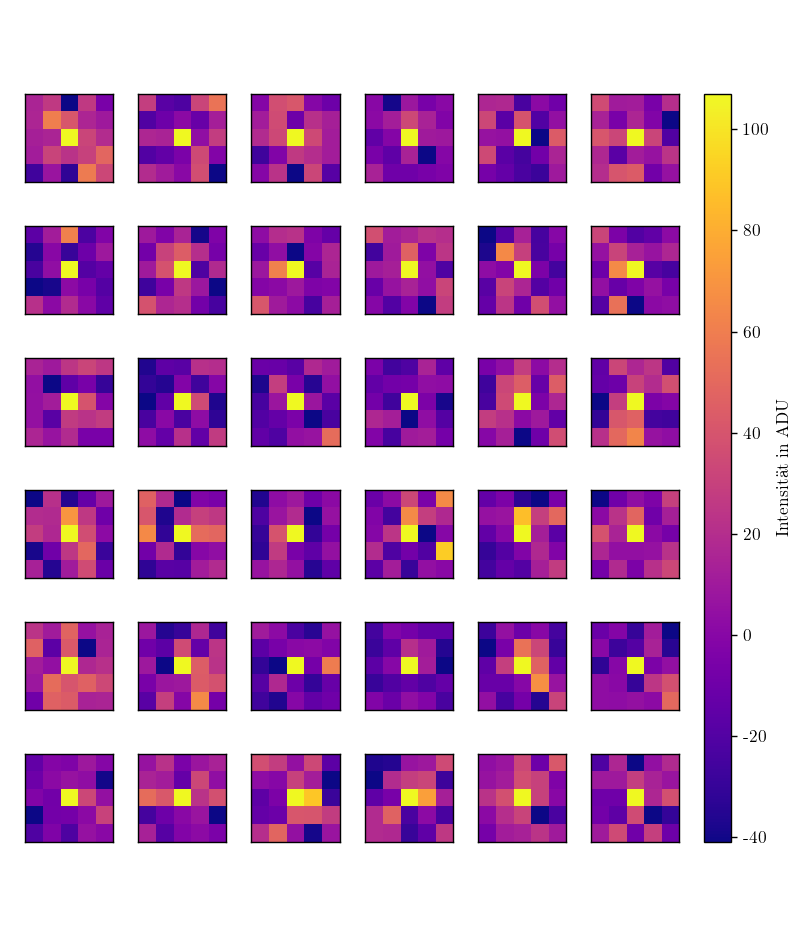

C:\Users\lunin\AppData\Local\Temp/ipykernel_8388/3273933732.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [14]:
%matplotlib notebook
fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(6,6),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )


letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img in zip(grid, hotspots):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    #axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.imshow(img, cmap=cmap, rasterized=True)
    #for (j,i),label in np.ndenumerate(img):
        #axis.text(i,j,"%.1f" % label, color='green',ha='center',va='center')
    
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Intensität in ADU')
fig.tight_layout()

In [197]:
lin_cluster_norm = matplotlib.colors.Normalize(-25, 130)

<IPython.core.display.Javascript object>


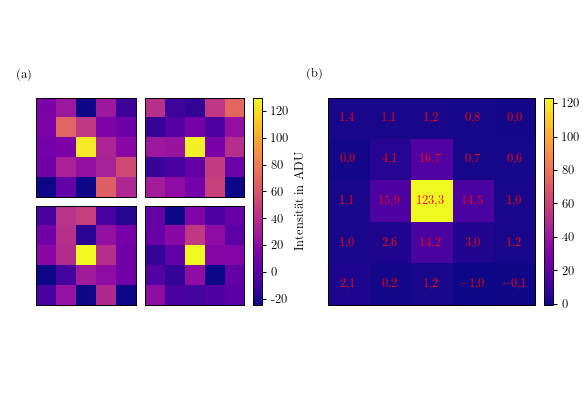

In [198]:
%matplotlib notebook
fig = plt.figure(figsize=(6.48,4.5))
(subfig_l, subfig_r) = fig.subfigures(nrows=1, ncols=2, width_ratios=(1,1),)
grid1 = ImageGrid(subfig_l, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,2),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size=0.1,
                 #cbar_pad=0.15,
                 )
grid2 = ImageGrid(subfig_r, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,1),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="each",
                 cbar_size=0.1,
                 #cbar_pad=0.15,
                 )

for axis, img in zip(grid1, hotspots):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    #axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.imshow(img, cmap=cmap, norm=lin_cluster_norm, interpolation='none', rasterized=True)
    #for (j,i),label in np.ndenumerate(img):
        #axis.text(i,j,"\\num{%.1f}" % label, color='red',ha='center',va='center')
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Intensität in ADU')

axis = grid1[0]
axis.text(-0.2, 1.2, '(a)', transform=axis.transAxes,)

axis = grid2[0]
axis.text(-0.1, 1.1, '(b)', transform=axis.transAxes,)

for axis in grid2:
    axis.set_xticks([]) 
    axis.set_yticks([])
    im = axis.imshow(hotspots_average, cmap=cmap,  interpolation='none')
    cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Intensität in ADU')
    for (j,i),label in np.ndenumerate(hotspots_average):
        axis.text(i,j,"\\num{%.1f}" % label, color='red',ha='center',va='center')
#fig.tight_layout(pad=2.7)
#fig.tight_layout()

In [210]:
print('sum over kreuz', hotspots_average[1:4,1:4].sum())

sum over kreuz 194.91963


In [196]:
fig.savefig(plots_output_path + 'average_and_5x5_hotspot.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

194.91963


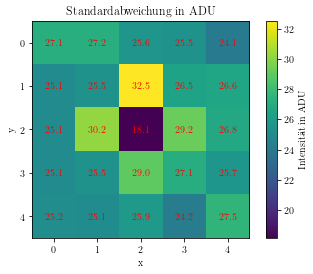

In [17]:
%matplotlib inline
plt.imshow(hotspots_std)
plt.colorbar(label='Intensität in ADU')
for (j,i),label in np.ndenumerate(hotspots_std):
    plt.text(i,j,"%.1f" % label, color='red',ha='center',va='center')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Standardabweichung in ADU')
print(hotspots_average[1:4,1:4].sum(axis=(0,1)))


C:\Users\lunin\AppData\Local\Temp/ipykernel_8388/3700204158.py:3: RuntimeWarning: invalid value encountered in sqrt
  hotspots_std_only_spread = np.sqrt(hotspots_std**2 - 25**2)


194.91963


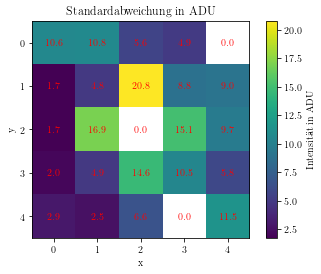

In [24]:
%matplotlib inline

hotspots_std_only_spread = np.sqrt(hotspots_std**2 - 25**2)


plt.imshow(hotspots_std_only_spread)
plt.colorbar(label='Intensität in ADU')
for (j,i),label in np.ndenumerate(hotspots_std_only_spread):
    lab = label
    if np.isnan(lab):
        lab = 0.0
    plt.text(i,j,"%.1f" % lab, color='red',ha='center',va='center')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Standardabweichung in ADU')
print(hotspots_average[1:4,1:4].sum(axis=(0,1)))


In [ ]:
plt.savefig('std_dev.jpg', dpi=300)

# Hotspots 5x5 areas, central pixel >90 th and <180 ADU, 3x3 area > 161 and < 200 ADU

In [171]:
hotspots = np.load('5x5_hotspots_th_central_pixel_90-180_3x3_180-9std_180+9std.npy')
hotspots.shape

(2944, 5, 5)

In [172]:
hotspots_average = np.average(hotspots, axis=0)
hotspots_std = np.std(hotspots, axis=0)

In [173]:
lin_cluster_norm = matplotlib.colors.Normalize(-25, 130)

<IPython.core.display.Javascript object>


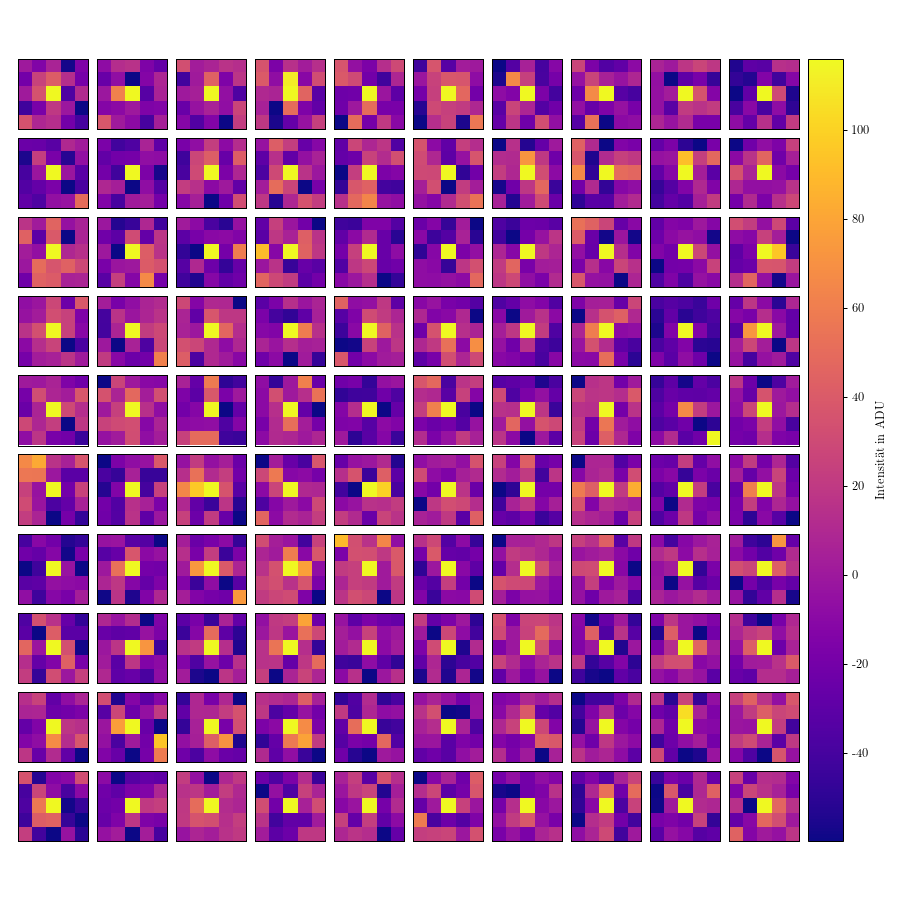

C:\Users\lunin\AppData\Local\Temp/ipykernel_4344/3123827079.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [174]:
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(10,10),
                 axes_pad=(0.1, 0.1),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )


letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img in zip(grid, hotspots):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    #axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.imshow(img, cmap=cmap, rasterized=True)
    #for (j,i),label in np.ndenumerate(img):
        #axis.text(i,j,"%.1f" % label, color='green',ha='center',va='center')
    
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Intensität in ADU')
fig.tight_layout()

In [191]:
intersting_spots = hotspots[[3, 16, 17, 29, 32, 61, 63, 71, 72, 80, 92,]]

<IPython.core.display.Javascript object>


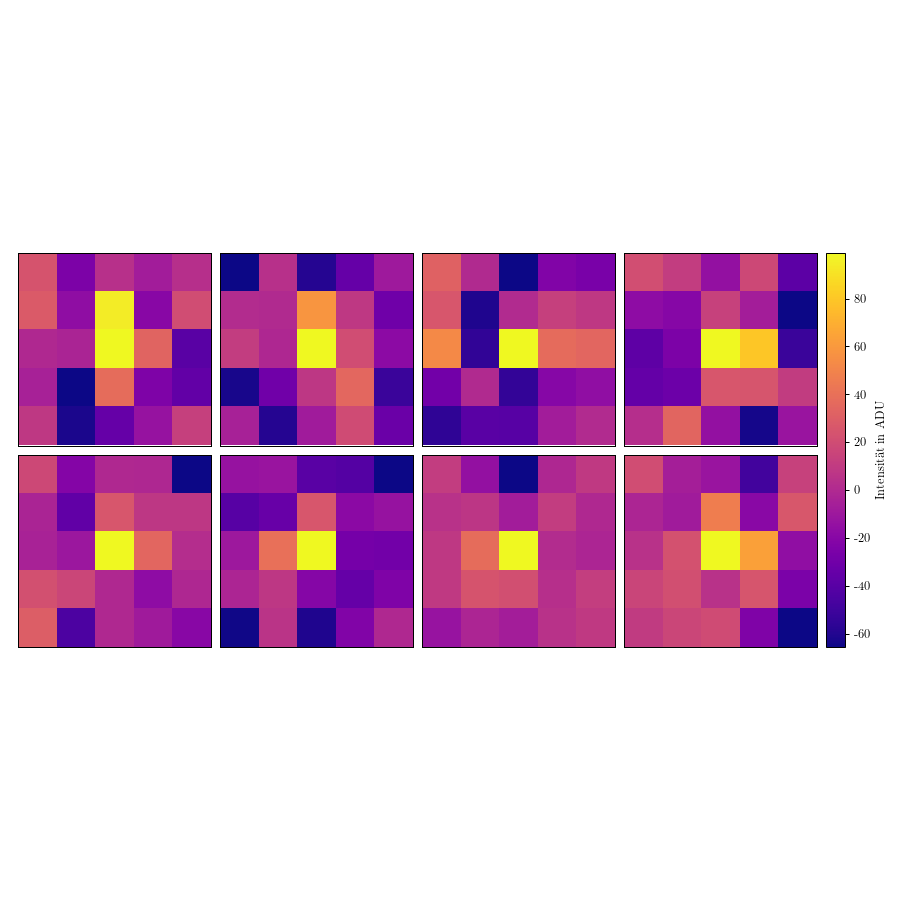

C:\Users\lunin\AppData\Local\Temp/ipykernel_4344/437725327.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [176]:
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,4),
                 axes_pad=(0.1, 0.1),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )


letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img in zip(grid, intersting_spots):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    #axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.imshow(img, cmap=cmap, rasterized=True)
    #for (j,i),label in np.ndenumerate(img):
        #axis.text(i,j,"%.1f" % label, color='green',ha='center',va='center')
    
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Intensität in ADU')
fig.tight_layout()

C:\Users\lunin\AppData\Local\Temp/ipykernel_4344/1652948273.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


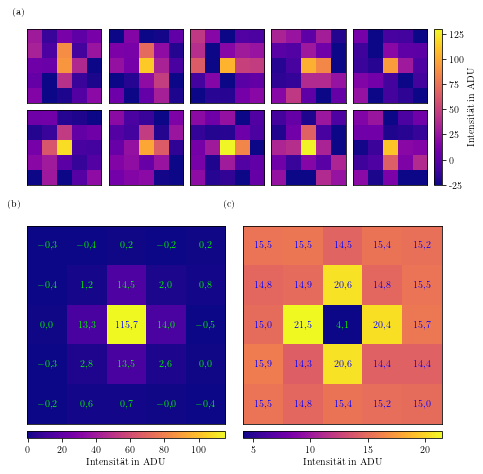

In [192]:
%matplotlib inline
fig = plt.figure(figsize=(6.48,6.25))
(subfig_l, subfig_r) = fig.subfigures(nrows=2, ncols=1, height_ratios=(1,1),)
grid1 = ImageGrid(subfig_l, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,5),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size=0.1,
                 #cbar_pad=0.15,
                 )
grid2 = ImageGrid(subfig_r, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=(0.25,0.1),
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="each",
                 cbar_size=0.1,
                 #cbar_pad=0.15,
                 )

for axis, img in zip(grid1, intersting_spots):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    #axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.imshow(img, cmap=cmap, norm=lin_cluster_norm, interpolation='none', rasterized=True)
    #for (j,i),label in np.ndenumerate(img):
        #axis.text(i,j,"\\num{%.1f}" % label, color='red',ha='center',va='center')
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Intensität in ADU')

axis = grid1[0]
axis.text(-0.2, 1.2, '(a)', transform=axis.transAxes,)

axis = grid2[0]
axis.text(-0.1, 1.1, '(b)', transform=axis.transAxes,)

axis = grid2[1]
axis.text(-0.1, 1.1, '(c)', transform=axis.transAxes,)
average_std = [hotspots_average, np.nan_to_num(np.sqrt(hotspots_std**2 - 19.94**2))]
c = 0
for image, axis in zip(average_std, grid2):
    axis.set_xticks([]) 
    axis.set_yticks([])
    im = axis.imshow(image, cmap=cmap,  interpolation='none')
    cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label='Intensität in ADU')
    for (j,i),label in np.ndenumerate(image):
        if c == 0:
            color = 'lime'
            if label > 100:
                color = 'blue'
        else:
            color = 'blue'
            if label < 5.5:
                color= 'lime'
        axis.text(i,j,"\\num{%.1f}" % label, color=color,ha='center',va='center')
    c+=1
#fig.tight_layout(pad=2.7)
fig.tight_layout()

In [56]:
hotspots_average[1:4, 1:4].sum()

179.6254

In [193]:
fig.savefig(plots_output_path + 'examples_average_std_5x5_hotspot.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

In [177]:
fig.savefig('paper_export.png',  facecolor="w", dpi=400)